In [2]:
# Clone the repo
!git clone https://github.com/atikul-islam-sajib/pix2pix.git

Cloning into 'pix2pix'...
remote: Enumerating objects: 2733, done.
remote: Counting objects: 100% (258/258), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 2733 (delta 84), reused 185 (delta 35), pack-reused 2475
Receiving objects: 100% (2733/2733), 270.32 MiB | 20.46 MiB/s, done.
Resolving deltas: 100% (213/213), done.
Updating files: 100% (2334/2334), done.


In [3]:
# Change the current directory
%cd /content/pix2pix

/content/pix2pix


In [4]:
# Connect the GPU
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [5]:
# Import all the modules
from src.dataloader import Loader
from src.trainer import Trainer
from src.test import Test

In [10]:
loader = Loader(dataset = "/content/combined_images.zip", normalized=True)
loader.unzip_folder()
dataloader = loader.create_dataloader()

In [ ]:
# Check the shape
sum(data.size(0) for data, _ in dataloader)

1000

In [ ]:
# Train the model witj arguments
trainer = Trainer(epochs = 100,
                  lr = 0.0002,
                  lambda_value = 100,
                  device = "cuda",
                  display = True,
                  clean_folder=True)

trainer.train(activate = True)

[Epochs - 1/100] - [Steps - 1000/1000] - [D_Loss - 0.08167693213181337] - [G_Loss - 7452365.7974375]
[Epochs - 2/100] - [Steps - 1000/1000] - [D_Loss - 0.025431833746362827] - [G_Loss - 6838351.3076875]
[Epochs - 3/100] - [Steps - 1000/1000] - [D_Loss - 0.0005634325084174634] - [G_Loss - 6736672.798625]
[Epochs - 4/100] - [Steps - 1000/1000] - [D_Loss - 0.00022926213053870014] - [G_Loss - 6706028.3705]
[Epochs - 5/100] - [Steps - 1000/1000] - [D_Loss - 0.00012121052469410643] - [G_Loss - 6683398.5324375]
[Epochs - 6/100] - [Steps - 1000/1000] - [D_Loss - 6.269255820825492e-05] - [G_Loss - 6660905.310875]
[Epochs - 7/100] - [Steps - 1000/1000] - [D_Loss - 2.4889226268442142e-05] - [G_Loss - 6645109.652625]
[Epochs - 8/100] - [Steps - 1000/1000] - [D_Loss - 1.41926670689827e-05] - [G_Loss - 6622914.7589375]
[Epochs - 9/100] - [Steps - 1000/1000] - [D_Loss - 8.896099986259287e-06] - [G_Loss - 6614238.0239375]
[Epochs - 10/100] - [Steps - 1000/1000] - [D_Loss - 5.446738188879863e-06] - [G_

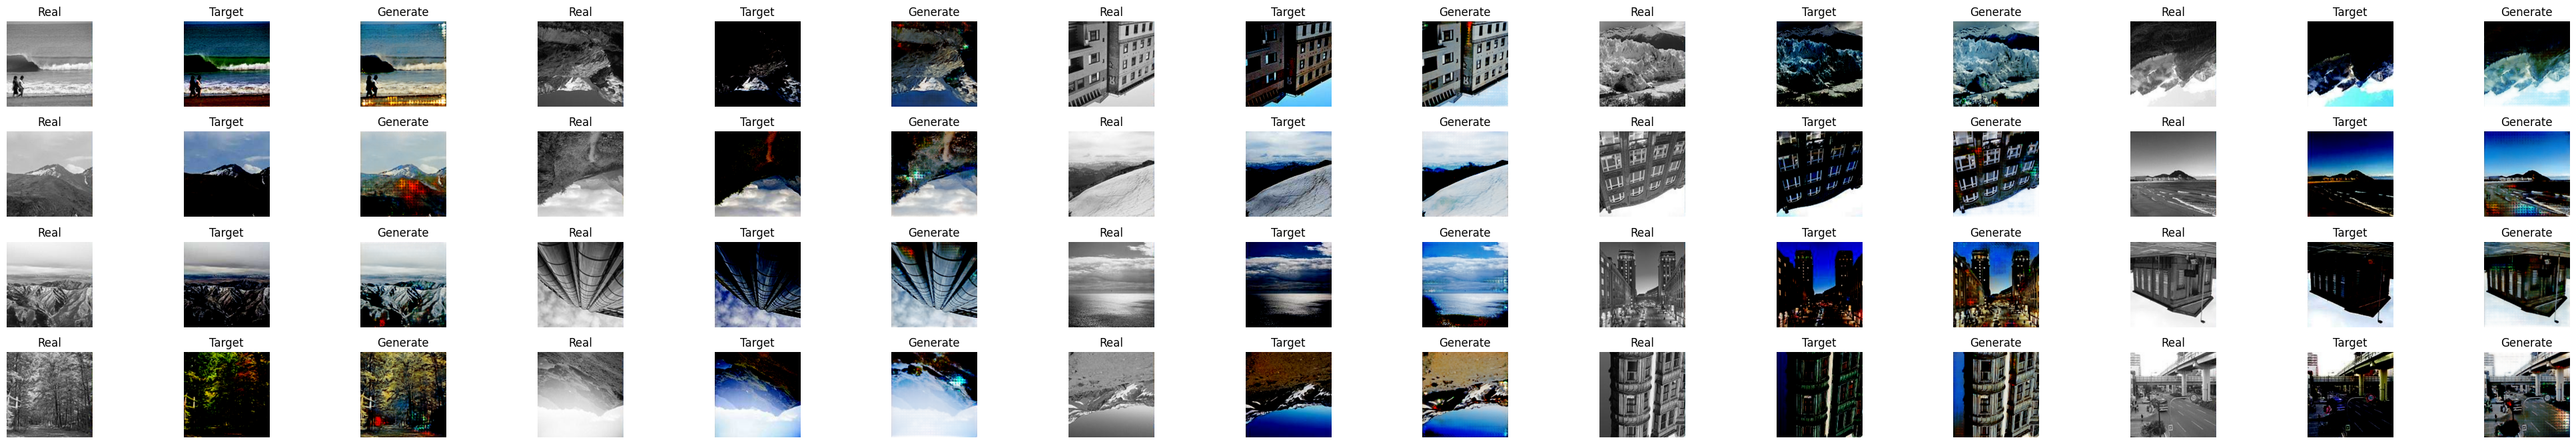

In [20]:
# Test the model
import warnings
warnings.filterwarnings("ignore")


plot = Test(num_samples = 20, device = "cuda")
plot.test()

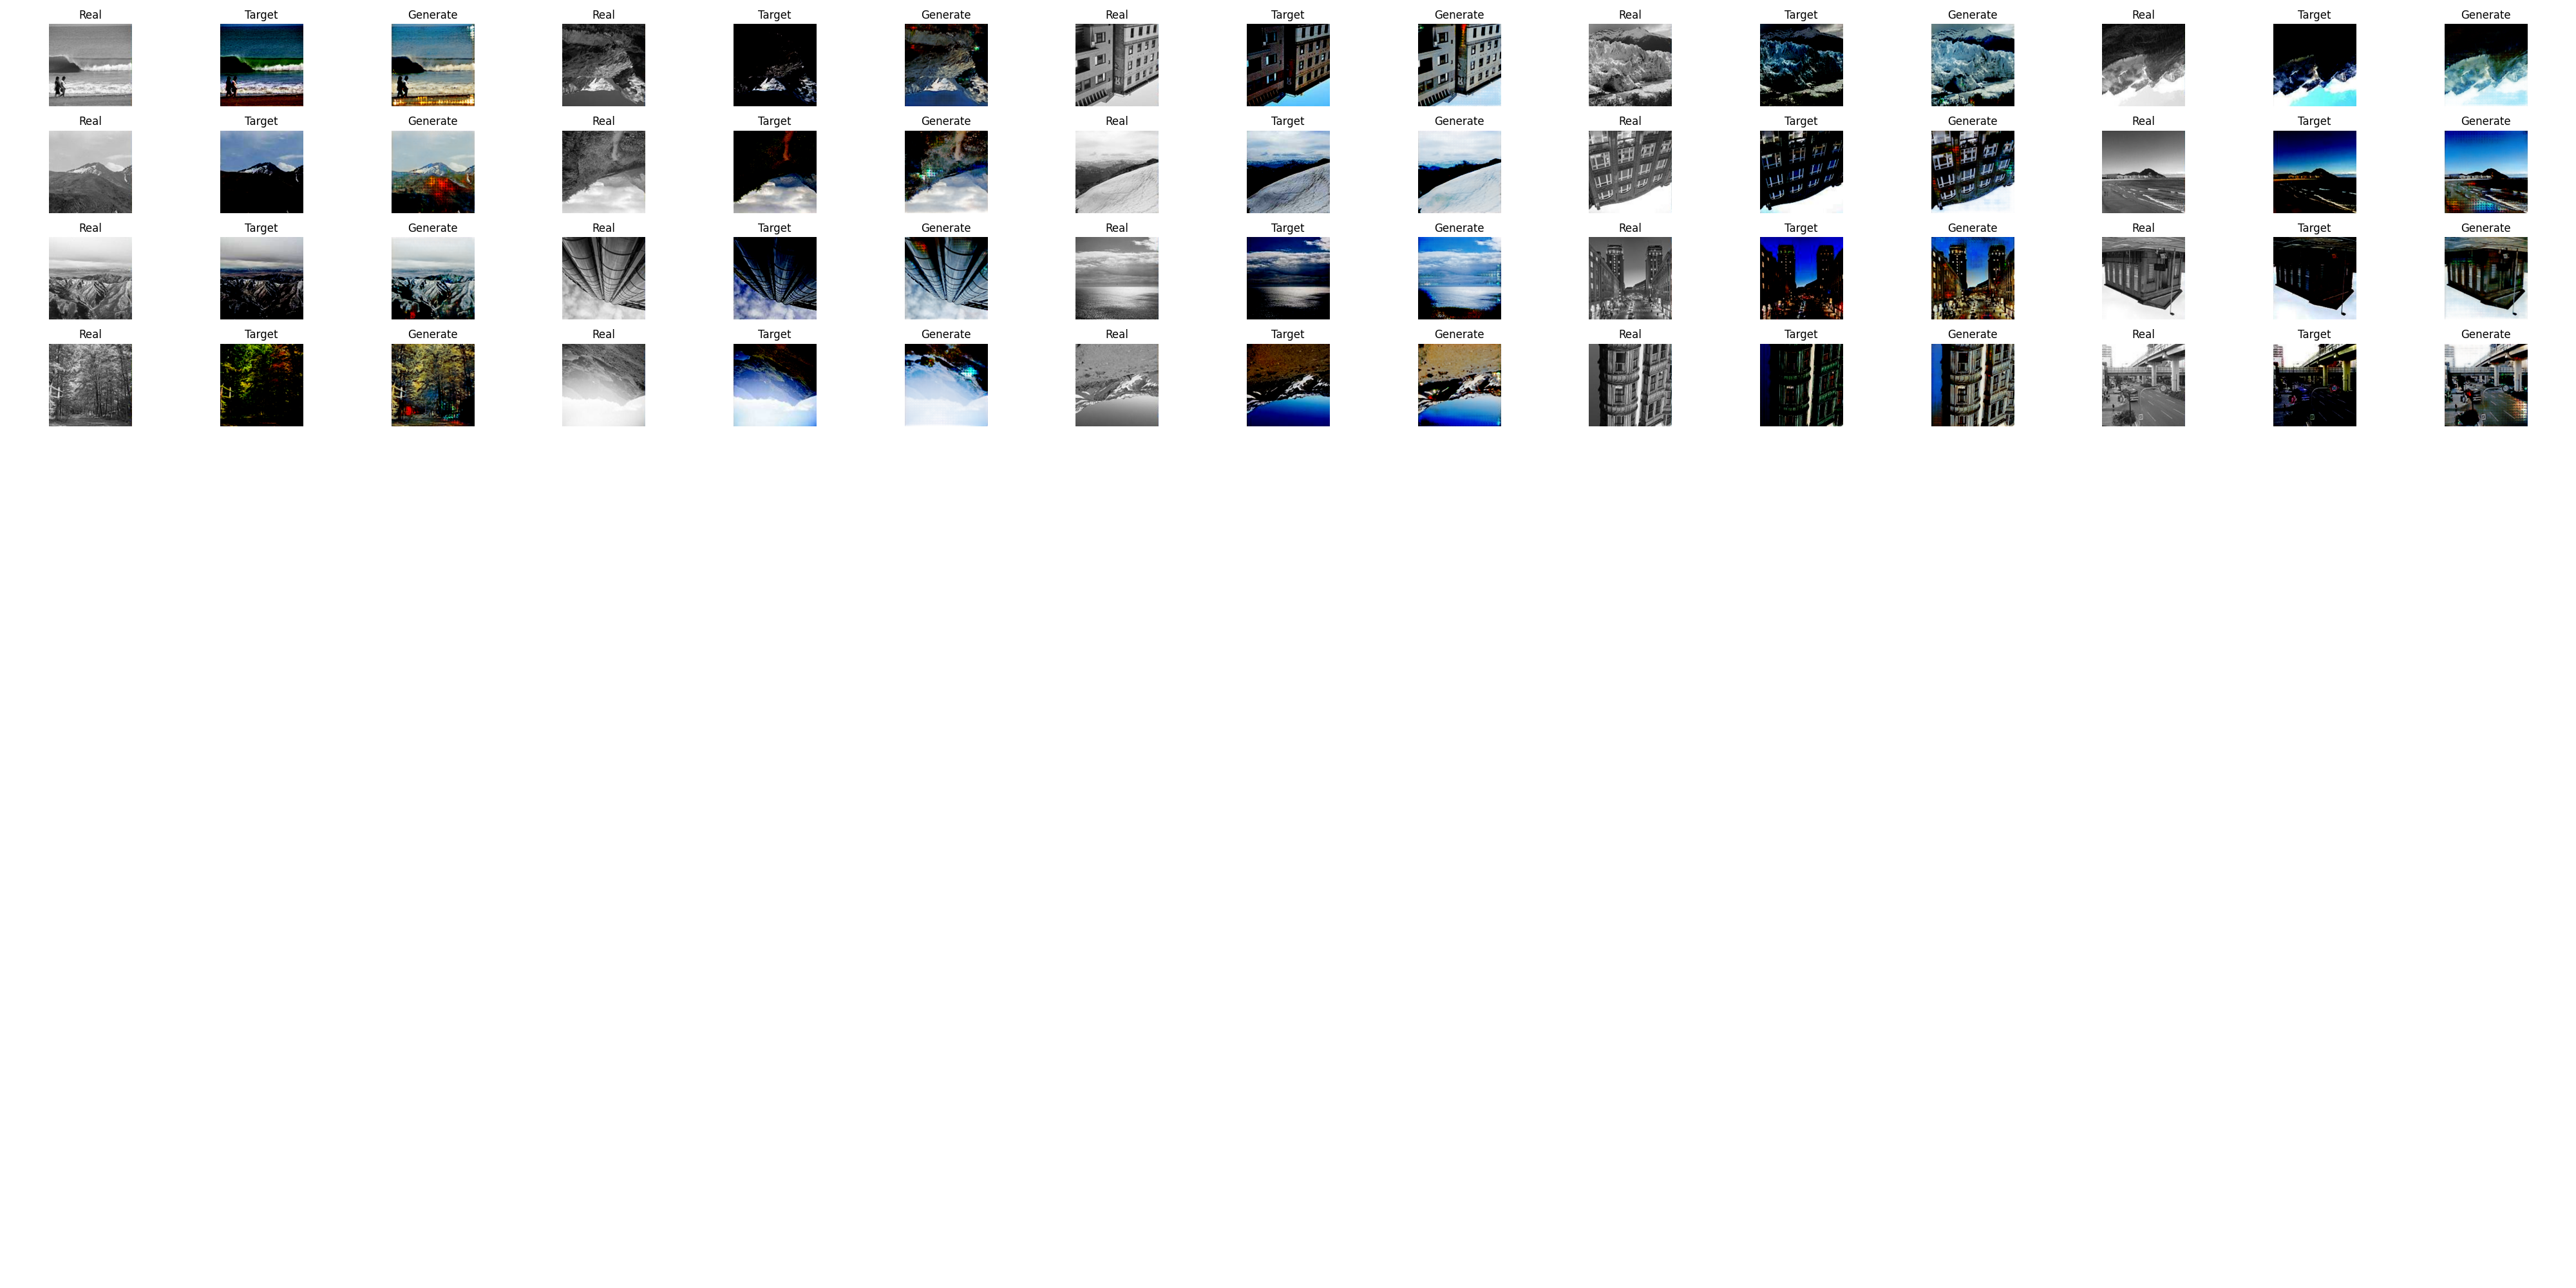

In [21]:
# Plot the Image
from IPython.display import Image

Image("/content/pix2pix/outputs/test_images/test.png")